In [1]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from IPython.display import display, HTML

#HTML(df.to_html())
#display(df)

hpi_red = '#b00639'
hpi_blue = '#007a9e'
hpi_yellow = '#ffde94'

def get_column_names(cached): 
    file_name = 'data_structure_query_' + cached + '_results.csv.json'
    table_info = json.load(open(file_name,'r'))
    column_names = []
    for column in table_info["columns"]:
        column_names.append(column["name"])
    return column_names

def get_results(cached):
    file_name = 'data_structure_query_' + cached + '_results.csv'
    return pd.read_csv(file_name, header=None, names=get_column_names(cached))

# Columns: data_type, data_structure, sample_size, value_count, run_time
def select(data, data_type, data_structure):
    return data[(data.data_type == data_type) & (data.data_structure == data_structure)]

def barplot(data_type):
    #Prepare data
    results_cached = get_results("cached")
    sample_size_cached = results_cached["sample_size"].iloc[0]
    filter_result_cached = select(results_cached, data_type, "filter")["run_time"].iloc[0]
    dictionary_result_cached = select(results_cached, data_type, "dictionary")["run_time"].iloc[0]
    filter_result_cached = sample_size_cached / (filter_result_cached / pow(10, 6))
    dictionary_result_cached = sample_size_cached / (dictionary_result_cached / pow(10, 6))
    
    results_uncached = get_results("uncached")
    sample_size_uncached = results_uncached["sample_size"].iloc[0]
    filter_result_uncached = select(results_uncached, data_type, "filter")["run_time"].iloc[0]
    dictionary_result_uncached = select(results_uncached, data_type, "dictionary")["run_time"].iloc[0]
    filter_result_uncached = sample_size_uncached / (filter_result_uncached / pow(10, 6))
    dictionary_result_uncached = sample_size_uncached / (dictionary_result_uncached / pow(10, 6))
    
    # Configure figure
    #plt.rc('xtick', labelsize=8)
    plt.rc('axes', titlesize=10)
    plt.rc('figure', titlesize=13)
    plt.rc('figure', figsize=(8, 4))
    
    # Plot data
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    title = "Million Lookups per Second: " + data_type.title()
    f.suptitle(title, y=1.03)
    labels=["Dictionary", "Filter"]
    
    bars = np.array([dictionary_result_cached, filter_result_cached]) / pow(10, 6)
    ax1.bar(range(2), bars, width=1/1.5, tick_label=labels, color=[hpi_red, hpi_yellow], linewidth=1.0, edgecolor=['black', 'black'])
    ax1.set_title("Cached")
    ax1.yaxis.grid()
    ax1.set_axisbelow(True)
    
    bars = np.array([dictionary_result_uncached, filter_result_uncached]) / pow(10, 6)
    ax2.bar(range(2), bars, width=1/1.5, tick_label=labels, color=[hpi_red, hpi_yellow], linewidth=1.0, edgecolor=['black', 'black'])
    ax2.set_title("Uncached")
    ax2.yaxis.grid()
    ax2.set_axisbelow(True)
    
    # Save output and render
    file_name = title.replace(" ", "_").replace(":", "_")
    plt.savefig('plots/data_structure_query/{}.pgf'.format(file_name))
    plt.savefig('plots/data_structure_query/{}.pdf'.format(file_name))
    plt.show()

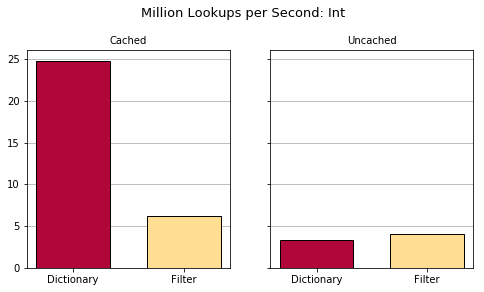

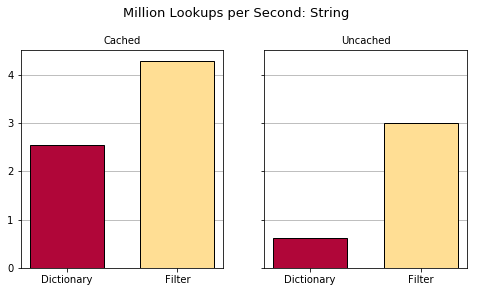

In [5]:
barplot("int")
barplot("string")